In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("../dataset/outputs.csv")

In [3]:
print(df.shape)
print(df.describe())

(70128, 11)
                IDS          Mois     RES1_BASE    RES11_BASE     PRO1_BASE  \
count  70128.000000  70128.000000  70128.000000  70128.000000  16654.000000   
mean   36311.645791      6.523728      1.018126      1.005332      0.994580   
std    22613.359627      3.448722      0.327419      0.370323      0.374402   
min        1.000000      1.000000      0.464839      0.375086      0.477145   
25%    17532.750000      4.000000      0.756438      0.758597      0.677279   
50%    35064.500000      7.000000      0.999876      0.934851      0.949498   
75%    52596.250000     10.000000      1.217374      1.230670      1.190569   
max    87648.000000     12.000000      2.190382      2.528628      2.438356   

            RES2_HC       RES2_HP       PRO2_HC       PRO2_HP  
count  70128.000000  70128.000000  16654.000000  16654.000000  
mean       0.992186      1.018606      1.005489      1.009992  
std        1.181766      0.865476      1.118614      0.698951  
min        0.000000 

In [4]:
df.head()

,IDS,Horodate_UTC,Horodate,Mois,RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
0,1,13/10/2013 22:00,2013-10-13T00:00:00+02:00,10,0.791405,0.698925,NaN,2.780413,0.346364,NaN,NaN
1,2,13/10/2013 22:30,2013-10-13T00:30:00+02:00,10,0.693700,0.722778,NaN,2.301527,0.375439,NaN,NaN
2,3,13/10/2013 23:00,2013-10-13T01:00:00+02:00,10,0.648565,0.678717,NaN,2.361320,0.268125,NaN,NaN
3,4,13/10/2013 23:30,2013-10-13T01:30:00+02:00,10,0.621059,0.668509,NaN,2.567490,0.192953,NaN,NaN
4,5,14/10/2013 00:00,2013-10-13T02:00:00+02:00,10,0.612245,0.700487,NaN,2.563460,0.075701,NaN,NaN


In [5]:
print(df.columns)

Index(['IDS', 'Horodate_UTC', 'Horodate', 'Mois', 'RES1_BASE', 'RES11_BASE',
       'PRO1_BASE', 'RES2_HC', 'RES2_HP', 'PRO2_HC', 'PRO2_HP'],
      dtype='object')


In [6]:
print(df.info(memory_usage='deep'))## dis le vrai usage de mémoire du df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IDS           70128 non-null  int64  
 1   Horodate_UTC  70128 non-null  object 
 2   Horodate      70128 non-null  object 
 3   Mois          70128 non-null  int64  
 4   RES1_BASE     70128 non-null  float64
 5   RES11_BASE    70128 non-null  float64
 6   PRO1_BASE     16654 non-null  float64
 7   RES2_HC       70128 non-null  float64
 8   RES2_HP       70128 non-null  float64
 9   PRO2_HC       16654 non-null  float64
 10  PRO2_HP       16654 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 15.2 MB
None


In [7]:
print(df.memory_usage(deep=True))## stockage par série

Index               128
IDS              561024
Horodate_UTC    5119344
Horodate        5750496
Mois             561024
RES1_BASE        561024
RES11_BASE       561024
PRO1_BASE        561024
RES2_HC          561024
RES2_HP          561024
PRO2_HC          561024
PRO2_HP          561024
dtype: int64


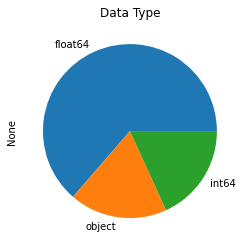

In [8]:
plt.title("Data Type")
df.dtypes.value_counts().plot.pie()# petit camenbert des différents type du dataframe
plt.show()

In [9]:
print((df.isna().sum()/df.shape[0]).sort_values(ascending=True))# voir le pourcentage de données manqauntes

IDS             0.00000
Horodate_UTC    0.00000
Horodate        0.00000
Mois            0.00000
RES1_BASE       0.00000
RES11_BASE      0.00000
RES2_HC         0.00000
RES2_HP         0.00000
PRO1_BASE       0.76252
PRO2_HC         0.76252
PRO2_HP         0.76252
dtype: float64


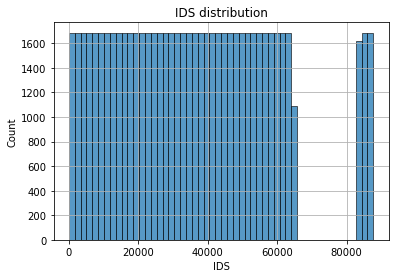

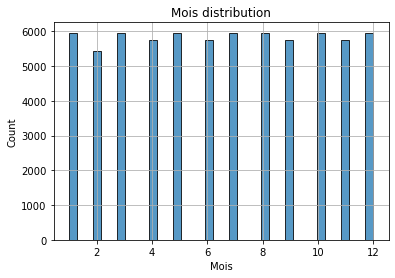

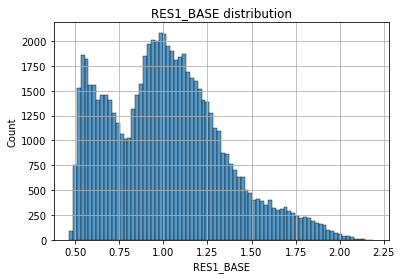

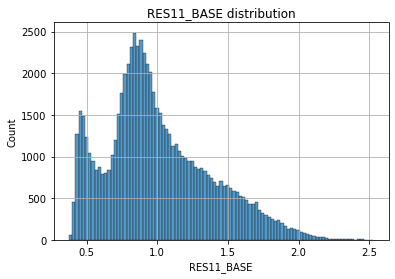

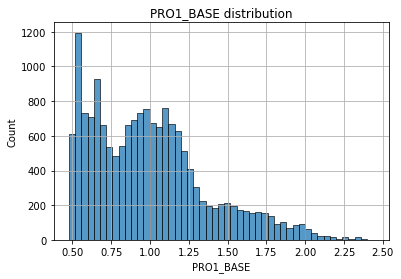

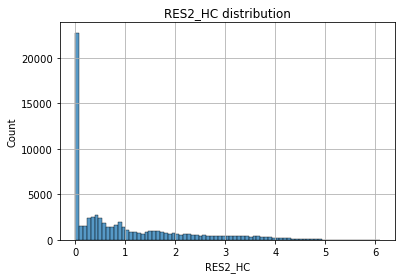

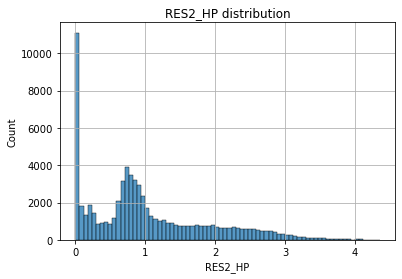

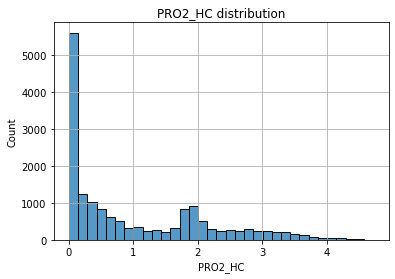

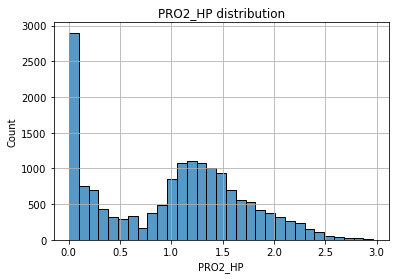

In [10]:
for col in df.select_dtypes(['int','float']):## tu peux aussi faire df.select_dtypes(exclude="object") par exemple
    plt.title(f"{col} distribution")
    sns.histplot(df[col])
    plt.grid()
    plt.show()

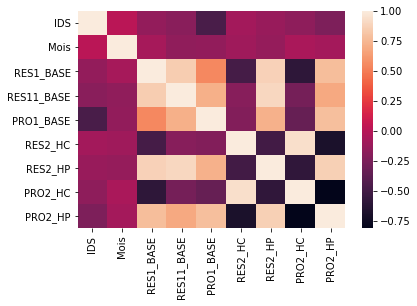

In [11]:
sns.heatmap(df.corr())
plt.show()

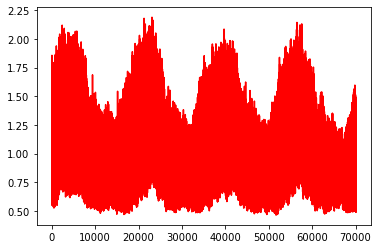

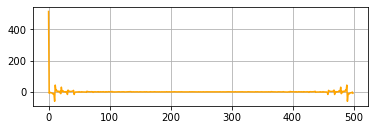

In [12]:
plt.subplot(1,1,1)
plt.plot(df["RES1_BASE"],"r")
plt.show()
plt.subplot(2,1,2)
N=len(df)
plt.plot(np.real(np.fft.fft(df["RES1_BASE"],n=500)),"orange")
plt.grid()
plt.show()

In [18]:
print(df.head())
mydf=df[['IDS','Horodate_UTC','RES1_BASE']]
mydf.head()

   IDS      Horodate_UTC                   Horodate  Mois  RES1_BASE  \
0    1  13/10/2013 22:00  2013-10-13T00:00:00+02:00    10   0.791405   
1    2  13/10/2013 22:30  2013-10-13T00:30:00+02:00    10   0.693700   
2    3  13/10/2013 23:00  2013-10-13T01:00:00+02:00    10   0.648565   
3    4  13/10/2013 23:30  2013-10-13T01:30:00+02:00    10   0.621059   
4    5  14/10/2013 00:00  2013-10-13T02:00:00+02:00    10   0.612245   

   RES11_BASE  PRO1_BASE   RES2_HC   RES2_HP  PRO2_HC  PRO2_HP  
0    0.698925        NaN  2.780413  0.346364      NaN      NaN  
1    0.722778        NaN  2.301527  0.375439      NaN      NaN  
2    0.678717        NaN  2.361320  0.268125      NaN      NaN  
3    0.668509        NaN  2.567490  0.192953      NaN      NaN  
4    0.700487        NaN  2.563460  0.075701      NaN      NaN  


,IDS,Horodate_UTC,RES1_BASE
0,1,13/10/2013 22:00,0.791405
1,2,13/10/2013 22:30,0.693700
2,3,13/10/2013 23:00,0.648565
3,4,13/10/2013 23:30,0.621059
4,5,14/10/2013 00:00,0.612245


In [33]:
import datetime 
def change_date_format(date):
    """We want to have this format for the prophet API : YYYY-MM-DD HH:MM:SS"""
    return datetime.datetime.strptime(date, '%d/%m/%Y %H:%M').strftime('%Y-%m-%d %H:%M:00')
    

basic_date="13/10/2013 22:00"
print(datetime.datetime.strptime("2013-1-25", '%Y-%m-%d').strftime('%m/%d/%y'))
datetime.datetime.strptime(basic_date, '%d/%m/%Y %H:%M').strftime('%Y-%m-%d %H:%M:00')

mydf["Horodate_UTC"].apply(change_date_format)

print(mydf)


01/25/13
         IDS      Horodate_UTC  RES1_BASE
0          1  13/10/2013 22:00   0.791405
1          2  13/10/2013 22:30   0.693700
2          3  13/10/2013 23:00   0.648565
3          4  13/10/2013 23:30   0.621059
4          5  14/10/2013 00:00   0.612245
...      ...               ...        ...
70123  87644  13/10/2018 19:30   1.089678
70124  87645  13/10/2018 20:00   1.015665
70125  87646  13/10/2018 20:30   0.933686
70126  87647  13/10/2018 21:00   0.854366
70127  87648  13/10/2018 21:30   0.789682

[70128 rows x 3 columns]
